In [8]:
import os
import numpy as np
import pandas as pd
from Scripts.preprocess import ConvolutionalFeatureExtractor 

base_dir = "E:/@IIT_BBS/@Sem 1/ML/Final Project/Final_Img_Data"
csv_df = pd.read_csv("E:\\@IIT_BBS\\@Sem 1\\ML\\Final Project\\Safety-Analysis\\Features\\Contextual Features\\data_cleaned.csv")
csv_df

,Name,Time,Human_Activity,Luminosity,Terrain,Presence_of_building,Mechanical_Activity,Nearby_vegetation,Safety
0,IMG_1854.jpg,Night,0,Well_Lit,Road,0,0,Low,Safe
1,IMG_1855.jpg,Night,0,Well_Lit,Road,0,0,Low,Safe
2,IMG_1856.jpg,Morning,0,Daylight,Road,1,0,Low,Safe
3,IMG_1857.jpg,Afternoon,0,Daylight,Road,1,0,Low,Safe
4,IMG_1858.jpg,Afternoon,0,Daylight,Muddy,0,0,High,Risky
...,...,...,...,...,...,...,...,...,...
907,20251116_142845.jpg,Afternoon,0,Daylight,Muddy,1,0,High,Risky
908,20251116_142902.jpg,Afternoon,0,Daylight,Rough,0,0,High,Risky
909,20251116_142939.jpg,Afternoon,0,Daylight,Rough,0,0,High,Risky
910,20251116_143135.jpg,Afternoon,0,Daylight,Muddy,0,0,High,Dangerous


array([[<Axes: title={'center': 'Time'}>,
        <Axes: title={'center': 'Human_Activity'}>,
        <Axes: title={'center': 'Luminosity'}>],
       [<Axes: title={'center': 'Terrain'}>,
        <Axes: title={'center': 'Presence_of_building'}>,
        <Axes: title={'center': 'Mechanical_Activity'}>],
       [<Axes: title={'center': 'Nearby_vegetation'}>,
        <Axes: title={'center': 'Safety'}>, <Axes: >]], dtype=object)

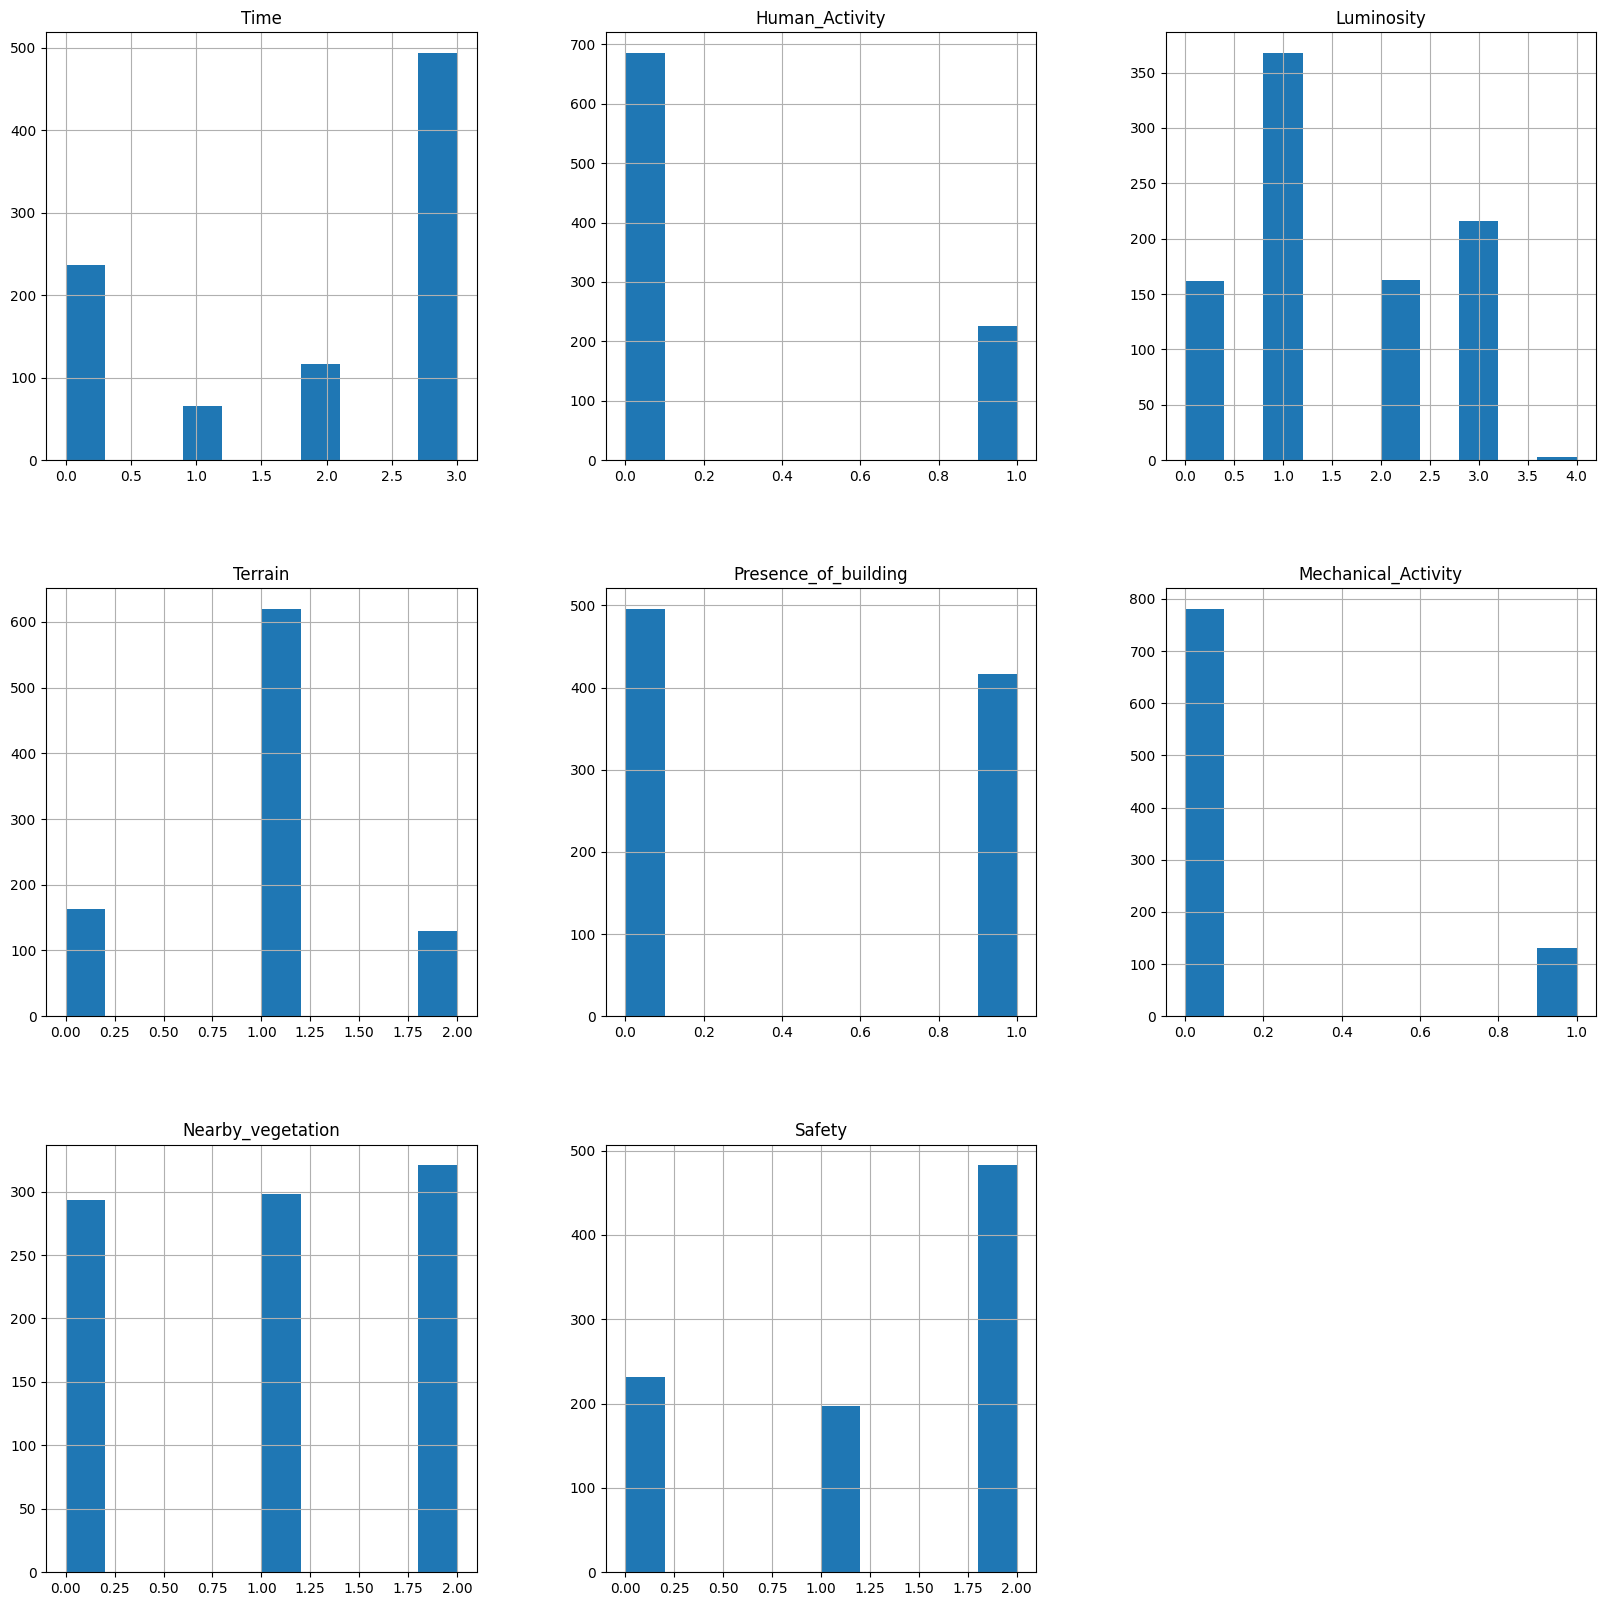

In [2]:

cat_cols = csv_df.select_dtypes(include=['object','category']).columns
csv_df[cat_cols] = csv_df[cat_cols].apply(lambda col: col.astype('category').cat.codes)
csv_df.iloc[:,1:].hist(figsize=(20,20))


In [4]:
csf_features = csv_df.drop(columns=['Name']).values
X_csf = csf_features[:,:-1].astype('float32')
y_csf = csf_features[:,-1].astype('float32')
print(X_csf.shape, y_csf.shape)

(912, 7) (912,)


In [5]:
CFE = ConvolutionalFeatureExtractor()
features = CFE.batch_CFE(batch_size=20, base_dir=base_dir, grayscale=False, kernel_size=3, target_size=5)


100%|██████████| 46/46 [4:13:20<00:00, 330.44s/it]  


In [9]:
X_vec = np.concatenate((features, X_csf), axis=1)
print(X_vec.shape)

(912, 817)


In [12]:
y_csf.shape

(912,)

In [10]:
np.savez_compressed('E:\\@IIT_BBS\\@Sem 1\\ML\\Final Project\\Safety-Analysis\\Features\\Image Features\\combined_features.npz', X=X_vec, y=y_csf)